In [823]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer, PowerTransformer

In [824]:
df_original = datasets.load_boston(return_X_y=False)

/home/jeo/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

In [825]:
x = pd.DataFrame(df_original.data, columns=df_original.feature_names)
y = pd.DataFrame(df_original.target, columns=['price'])

In [826]:
y.shape

(506, 1)

In [827]:
df = pd.concat((y, x), axis=1)

In [828]:
df.describe()

,price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [829]:
correlations = df.corr()
correlations.style.background_gradient(cmap='Greens')

,price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
price,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


In [830]:
scaler_min_max = MinMaxScaler()
scaler_standar = StandardScaler()
bc = PowerTransformer(method="box-cox")
rng = np.random.RandomState(304)
qt = QuantileTransformer(
    n_quantiles=500, output_distribution="normal", random_state=rng
)

In [831]:
def porcentaje_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    BI = Q1 - 1.5*IQR
    BS = Q3 + 1.5*IQR
    out = ((data < BI) | (data > BS))
    print("Porcentaje de outliers: ", 100*out.sum()/out.count())

def quitar_outliers(data, df_feature):
    Q1 = df_feature.quantile(0.25)
    Q3 = df_feature.quantile(0.75)
    IQR = Q3 - Q1
    BI = Q1 - 1.5*IQR
    BS = Q3 + 1.5*IQR
    out = ((df_feature > BI) & (df_feature < BS))
    data = data.loc[out]
    return data

Variable objetivo: Price

<AxesSubplot:ylabel='Count'>

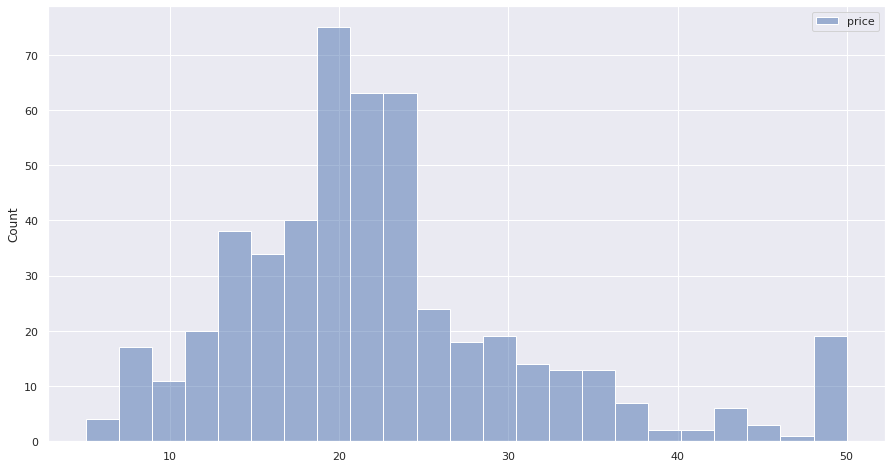

In [832]:
sns.histplot(y)

#### CHAS

<AxesSubplot:>

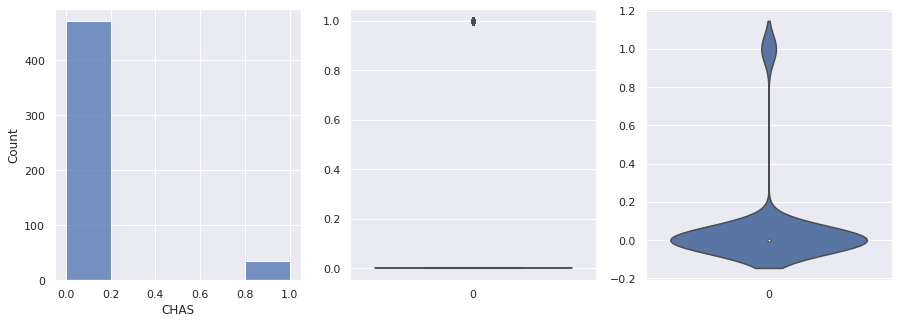

In [833]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.CHAS, bins=5 ,ax=axes[0])
sns.boxplot(data=df.CHAS, ax=axes[1])
sns.violinplot(data=df.CHAS, ax=axes[2])

#### LSTAT

In [834]:
#Normalizar Histograma
df.LSTAT = np.log(df.LSTAT)
#escalar
df.LSTAT = scaler_min_max.fit_transform(df.LSTAT.values.reshape(-1, 1))
#porcentaje outliers
porcentaje_outliers(df.LSTAT)
# Quitar outliers
df = quitar_outliers(df, df.LSTAT)
#porcentaje outliers
porcentaje_outliers(df.LSTAT)

Porcentaje de outliers:  0.1976284584980237
Porcentaje de outliers:  0.0


<AxesSubplot:>

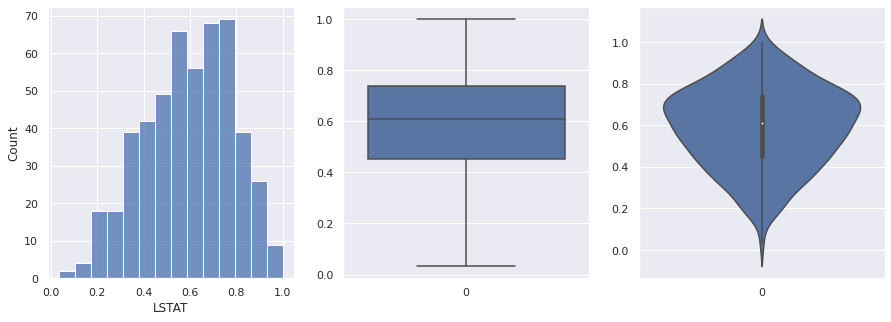

In [835]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.LSTAT, ax=axes[0])
sns.boxplot(data=df.LSTAT, ax=axes[1])
sns.violinplot(data=df.LSTAT, ax=axes[2])

#### RM

In [836]:
#escalar
df.RM = scaler_min_max.fit_transform(df.RM.values.reshape(-1, 1))
#porcentaje outliers
porcentaje_outliers(df.RM)
#quitar outliers
df = quitar_outliers(df, df.RM)
#porcentaje outliers
porcentaje_outliers(df.RM)

Porcentaje de outliers:  5.9405940594059405
Porcentaje de outliers:  1.0526315789473684


<AxesSubplot:>

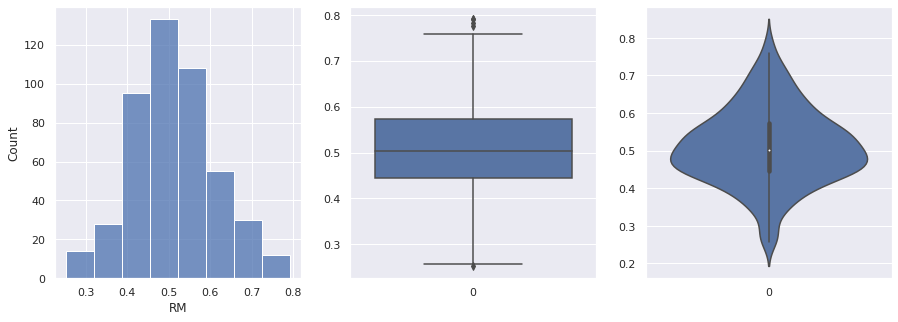

In [837]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.RM, bins=8 ,ax=axes[0])
sns.boxplot(data=df.RM, ax=axes[1])
sns.violinplot(data=df.RM, ax=axes[2])

#### PTRATIO

In [838]:
#Normalizar
df.PTRATIO = df.PTRATIO**2
#escalar
df.PTRATIO = scaler_min_max.fit_transform(df.PTRATIO.values.reshape(-1, 1))
#porcentaje de otuliers
porcentaje_outliers(df.PTRATIO)

Porcentaje de outliers:  0.0


<AxesSubplot:>

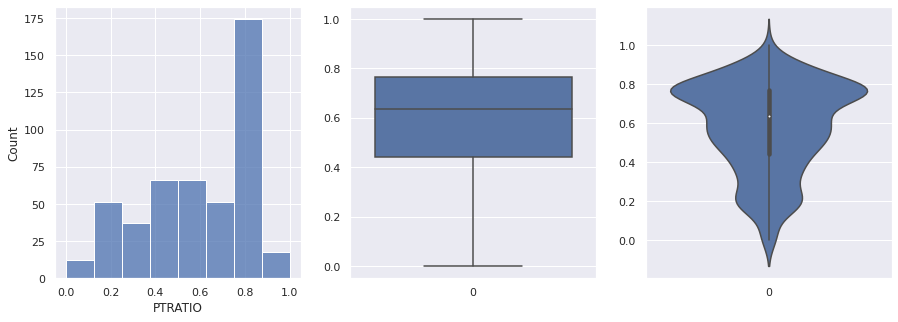

In [839]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.PTRATIO, bins=8, ax=axes[0])
sns.boxplot(data=df.PTRATIO, ax=axes[1])
sns.violinplot(data=df.PTRATIO, ax=axes[2])

#### TAX

In [840]:
#Normalizar
df.TAX = qt.fit_transform(df.TAX.values.reshape(-1, 1))
#escalar
df.TAX= scaler_standar.fit_transform(df.PTRATIO.values.reshape(-1, 1))
#Porcentaje de outliers
porcentaje_outliers(df.TAX)

Porcentaje de outliers:  0.0


/home/jeo/anaconda3/envs/data/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2583: UserWarning: n_quantiles (500) is greater than the total number of samples (475). n_quantiles is set to n_samples.
  warnings.warn(


<AxesSubplot:>

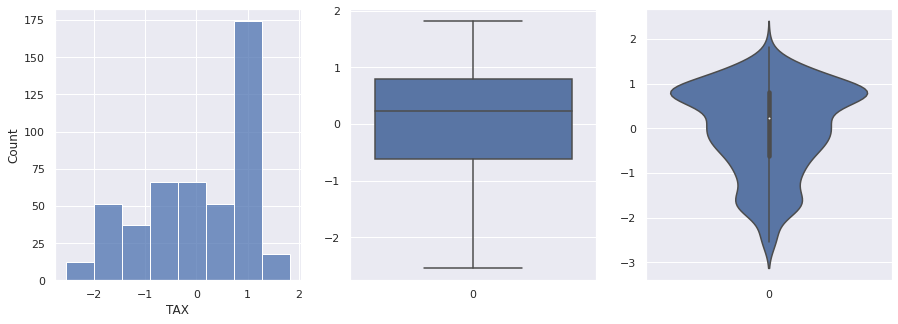

In [841]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.TAX, bins=8, ax=axes[0])
sns.boxplot(data=df.TAX, ax=axes[1])
sns.violinplot(data=df.TAX, ax=axes[2])

#### NOX

In [842]:
#Normalizar
df.NOX = 1/df.NOX
#Porcentaje Outliers
porcentaje_outliers(df.NOX)

Porcentaje de outliers:  0.0


<AxesSubplot:>

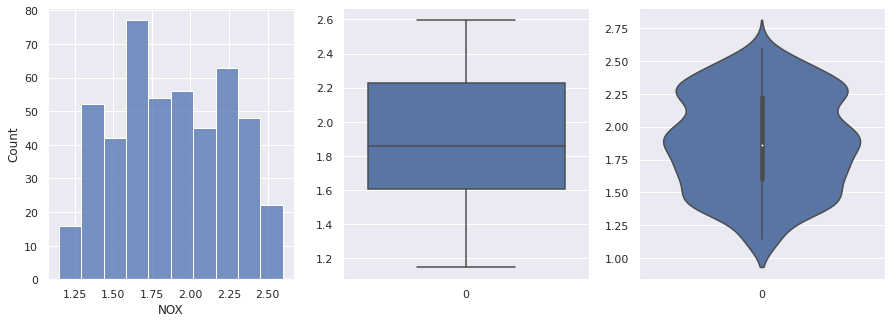

In [843]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.NOX, bins=10 ,ax=axes[0])
sns.boxplot(data=df.NOX, ax=axes[1])
sns.violinplot(data=df.NOX, ax=axes[2])

#### CRIM

In [844]:
#Normalizar
df.CRIM = np.log(df.CRIM)
#escalar
df.CRIM = scaler_min_max.fit_transform(df.CRIM.values.reshape(-1, 1))
#porceentaje de outliers
porcentaje_outliers(df.CRIM)

Porcentaje de outliers:  0.0


<AxesSubplot:>

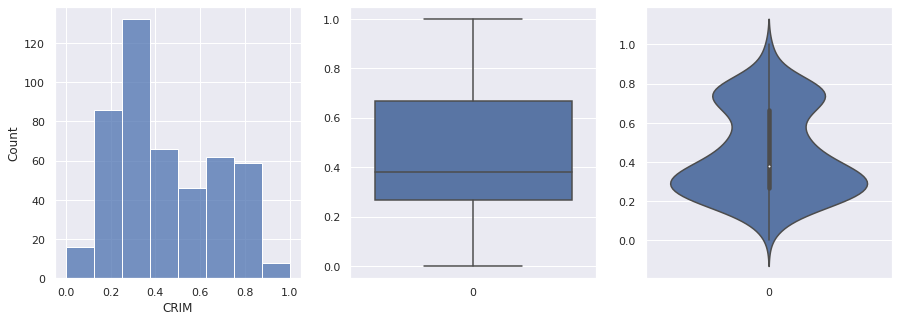

In [845]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.CRIM, bins=8 ,ax=axes[0])
sns.boxplot(data=df.CRIM, ax=axes[1])
sns.violinplot(data=df.CRIM, ax=axes[2])

#### RAD

<AxesSubplot:>

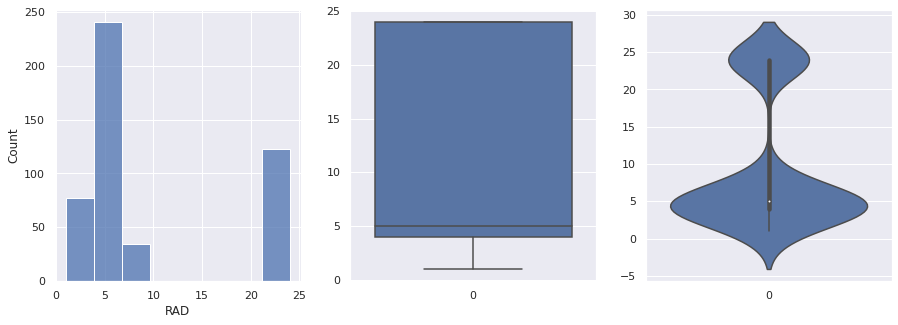

In [846]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.RAD, bins=8, ax=axes[0])
sns.boxplot(data=df.RAD, ax=axes[1])
sns.violinplot(data=df.RAD, ax=axes[2])

In [847]:
df.RAD.value_counts()

24.0    123
5.0     107
4.0     107
3.0      36
6.0      26
2.0      22
1.0      19
8.0      19
7.0      16
Name: RAD, dtype: int64

#### ZN (Solucionar problema de log(0) = -inf)

<AxesSubplot:>

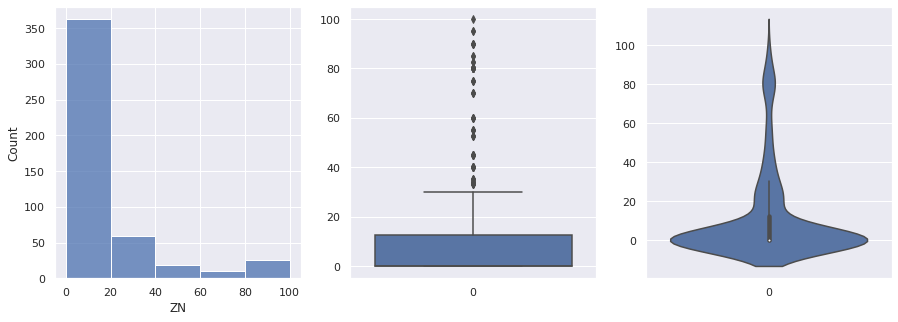

In [848]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.ZN, bins=5 ,ax=axes[0])
sns.boxplot(data=df.ZN, ax=axes[1])
sns.violinplot(data=df.ZN, ax=axes[2])

In [849]:
#df.ZN = 2**df.ZN

In [850]:
df.ZN.value_counts()

0.0      350
20.0      17
80.0      14
25.0      10
12.5      10
22.0       9
40.0       7
45.0       6
30.0       6
90.0       4
21.0       4
33.0       4
60.0       4
52.5       3
70.0       3
55.0       3
34.0       3
35.0       3
28.0       3
75.0       3
82.5       2
95.0       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [851]:
porcentaje_outliers(df.ZN)

Porcentaje de outliers:  13.473684210526315


#### B (problemas para normalizar)

<AxesSubplot:>

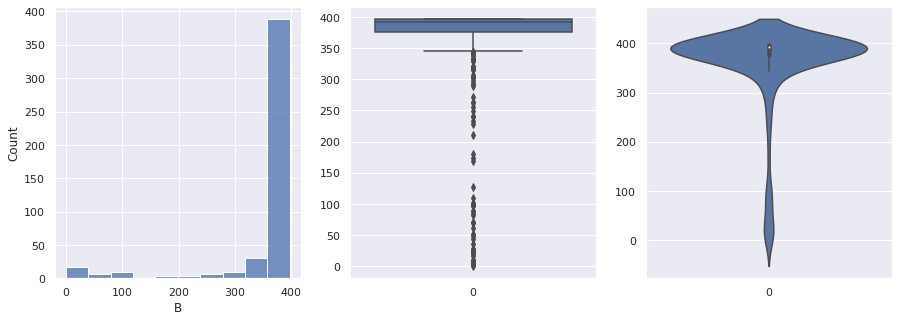

In [852]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.B, bins=10, ax=axes[0])
sns.boxplot(data=df.B, ax=axes[1])
sns.violinplot(data=df.B, ax=axes[2])

In [853]:
#df.B = qt.fit_transform(df.B.values.reshape(-1, 1))

In [854]:
porcentaje_outliers(df.B)

Porcentaje de outliers:  15.368421052631579


#### DIS

In [855]:
#Normalizar
df.DIS = np.log(df.DIS)
#porcentaje de outliers
porcentaje_outliers(df.DIS)

Porcentaje de outliers:  0.0


<AxesSubplot:>

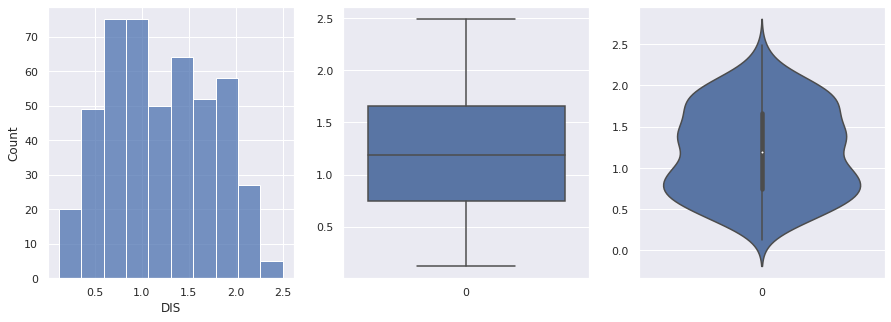

In [856]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df.DIS, bins=10 ,ax=axes[0])
sns.boxplot(data=df.DIS, ax=axes[1])
sns.violinplot(data=df.DIS, ax=axes[2])

#### 1_Análisis sin otulaiers de LSTAT, RM, PTRATIO, TAX, NOX, RAD, DIS, CRIM
#### Análisis de variables, no se tendrán en cuenta las variables INDUS, RAD, ZN, NOX, AGE, DIS por p>|t| > 0.05
#### Elimino TAX por colinealidad con PTRATIO

<AxesSubplot:xlabel='price', ylabel='Count'>

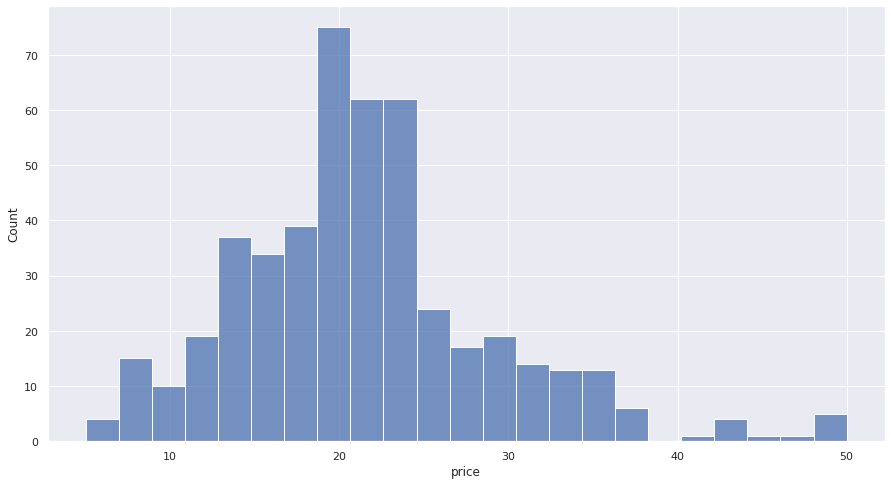

In [756]:
sns.histplot(df.price)

In [757]:
df.price.mean(), df.price.median()

(21.534736842105286, 20.8)

In [857]:
porcentaje_outliers(df.price)
df = quitar_outliers(df, df.price)
#escalar
df.price = scaler_min_max.fit_transform(df.price.values.reshape(-1, 1))

Porcentaje de outliers:  4.631578947368421


In [858]:
porcentaje_outliers(df.price)

Porcentaje de outliers:  1.3245033112582782


In [860]:
x = df[['CHAS', 'LSTAT', 'RM', 'PTRATIO', 'CRIM']]
y = df.price

In [861]:
correlations = x.corr()
correlations.style.background_gradient(cmap='Greens')

,CHAS,LSTAT,RM,PTRATIO,CRIM
CHAS,1.000000,0.016914,0.011943,-0.137556,0.007346
LSTAT,0.016914,1.000000,-0.591036,0.356166,0.652035
RM,0.011943,-0.591036,1.000000,-0.203984,-0.268947
PTRATIO,-0.137556,0.356166,-0.203984,1.000000,0.398992
CRIM,0.007346,0.652035,-0.268947,0.398992,1.000000


### Entrenar modelo

In [862]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape

((362, 5), (362,))

In [863]:
ml = sm.OLS(y_train.values.reshape(-1, 1), sm.add_constant(x_train))
ml_results = ml.fit()
ml_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     205.4
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          1.42e-102
Time:                        01:57:51   Log-Likelihood:                 301.95
No. Observations:                 362   AIC:                            -591.9
Df Residuals:                     356   BIC:                            -568.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7584      0.058     12.975      0.000       0.643       0.873
CHAS           0.0619      0.022      2.777      0.006       0.018       0.106
LSTAT         -0.5828      0.054    -10.881      0.000      -0.688      -0.477
RM             0.5304      0.073      7.278      0.000       0.387       0.674
PTRATIO       -0.1727      0.028     -6.237      0.000      -0.227      -0.118
CRIM          -0.1627      0.035     -4.700      0.000      -0.231      -0.095
==============================================================================
Omnibus:                       11.070   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.343
Skew:                           0.303   Prob(JB):                      0.00127
Kurtosis:                       3.719   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [864]:
# Valores Ajustados
fitted_values = ml_results.fittedvalues

# Valores residuales
residuals = ml_results.resid

#residuales estandarizados
lm_resid_stand = ml_results.get_influence().resid_studentized_internal

#raiz de los residuales normalizados absolutos
lm_resid_norm_abs_sqrt = np.sqrt(np.abs(lm_resid_stand))

#residuales absolutos
lm_resid_abs = np.abs(residuals)

In [865]:
sns.set(rc = {'figure.figsize':(15,8)})

In [866]:
y_pred = ml_results.predict(sm.add_constant(x_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

Mean squared error: 0.01


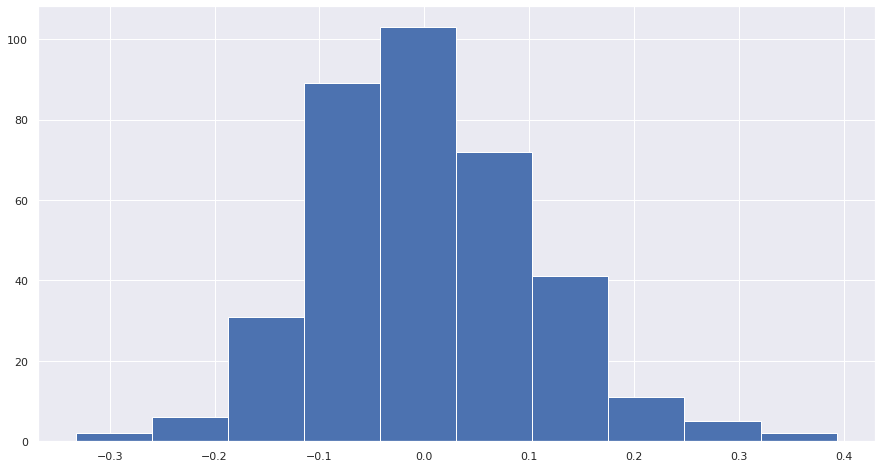

In [867]:
# Residuales
plt.hist(ml_results.resid)
plt.show()

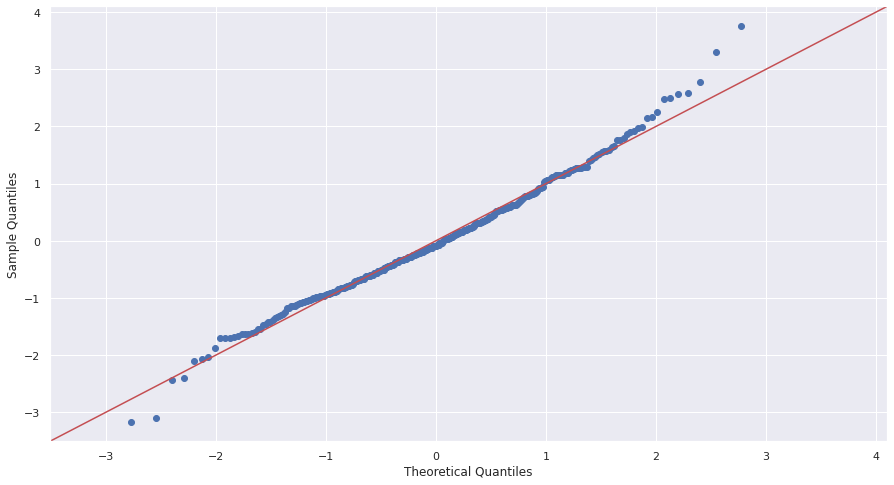

In [868]:
def grafico_qqplot():
    fig = sm.qqplot(lm_resid_stand,line='45')
    plt.show()

grafico_qqplot()

## Residuales vs ajustados

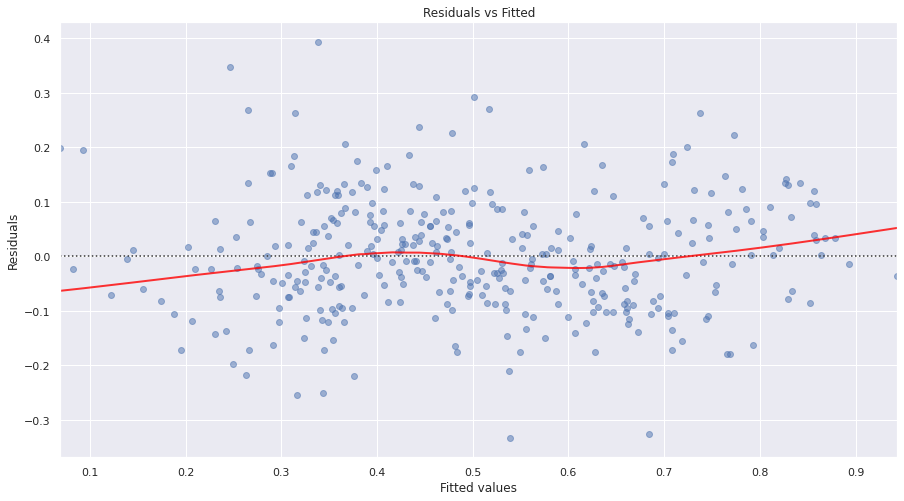

In [869]:
def residuales_vs_ajustados():
    plot = sns.residplot(x=fitted_values, y=residuals, lowess=True,
                         scatter_kws={'alpha': 0.5},
                         line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})

    # Titel and labels
    plot.set_title('Residuals vs Fitted')
    plot.set_xlabel('Fitted values')
    plot.set_ylabel('Residuals')
residuales_vs_ajustados()

## Scale Location

/home/jeo/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyError: 353

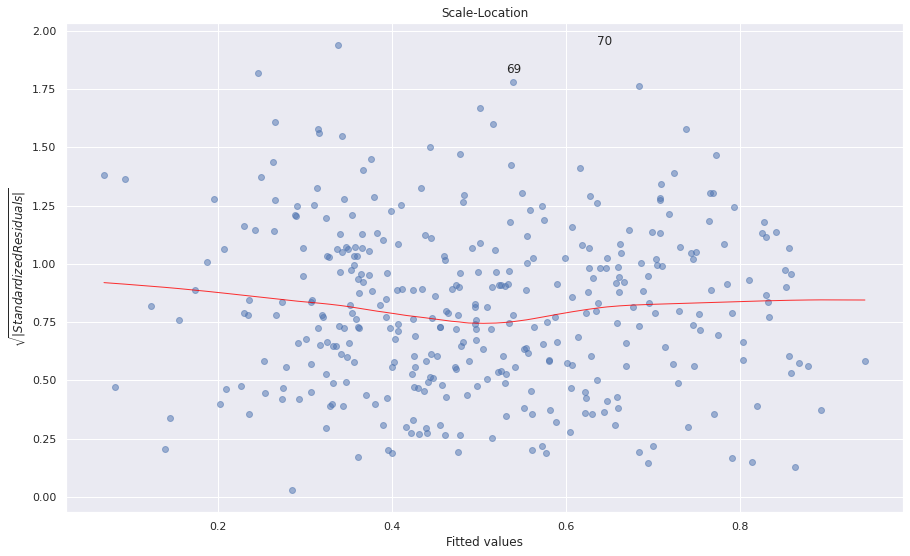

In [870]:
def scale_location():
    plot_lm_3 = plt.figure(figsize=(15,9))
    plt.scatter(fitted_values, lm_resid_norm_abs_sqrt, alpha=0.5)
    sns.regplot(fitted_values, lm_resid_norm_abs_sqrt,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plot_lm_3.axes[0].set_title('Scale-Location')
    plot_lm_3.axes[0].set_xlabel('Fitted values')
    plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

    # annotations
    abs_sq_norm_resid = np.flip(np.argsort(lm_resid_norm_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_sq_norm_resid_top_3:
        plot_lm_3.axes[0].annotate(i,
                                   xy=(fitted_values[i],
                                   lm_resid_norm_abs_sqrt[i]))
    plt.show()
scale_location()